<a href="https://colab.research.google.com/github/V-AISHVARYA/LGMVIP-DataScience-Task-9/blob/main/Handwritten_Equation_Solver_Using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##LGMVIP TASK9
**Handwritten equation solver using CNN**  
Mathematical equation solver using character and symbol recognition using image processing and CNN.

~Aishvarya.V

In [ ]:
import numpy as np
import cv2
from PIL import Image
from matplotlib import pyplot as plt
%matplotlib inline
import os
from os import listdir
from os.path import isfile, join
import pandas as pd

### Loading Input Images From Folder

In [ ]:
def load_images_from_folder(folder):
    train_data=[]
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename),cv2.IMREAD_GRAYSCALE)
        img=~img
        if img is not None:
            ret,thresh=cv2.threshold(img,127,255,cv2.THRESH_BINARY)

            ctrs,ret=cv2.findContours(thresh,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)
            cnt=sorted(ctrs, key=lambda ctr: cv2.boundingRect(ctr)[0])
            w=int(28)
            h=int(28)
            maxi=0
            for c in cnt:
                x,y,w,h=cv2.boundingRect(c)
                maxi=max(w*h,maxi)
                if maxi==w*h:
                    x_max=x
                    y_max=y
                    w_max=w
                    h_max=h
            im_crop= thresh[y_max:y_max+h_max+10, x_max:x_max+w_max+10]
            im_resize = cv2.resize(im_crop,(28,28))
            im_resize=np.reshape(im_resize,(784,1))
            train_data.append(im_resize)
    return train_data

In [14]:
data=[]

### Assigning The Data into Different groups

In [64]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [17]:
!unzip "/content/drive/MyDrive/archive.zip" -d "/content/drive/MyDrive/HWE"

Streaming output truncated to the last 5000 lines.
  inflating: /content/drive/MyDrive/HWE/extracted_images/0/0_24106.jpg  
  inflating: /content/drive/MyDrive/HWE/extracted_images/0/0_2414.jpg  
  inflating: /content/drive/MyDrive/HWE/extracted_images/0/0_24177.jpg  
  inflating: /content/drive/MyDrive/HWE/extracted_images/0/0_2420.jpg  
  inflating: /content/drive/MyDrive/HWE/extracted_images/0/0_24398.jpg  
  inflating: /content/drive/MyDrive/HWE/extracted_images/0/0_24469.jpg  
  inflating: /content/drive/MyDrive/HWE/extracted_images/0/0_2462.jpg  
  inflating: /content/drive/MyDrive/HWE/extracted_images/0/0_24690.jpg  
  inflating: /content/drive/MyDrive/HWE/extracted_images/0/0_24761.jpg  
  inflating: /content/drive/MyDrive/HWE/extracted_images/0/0_2490.jpg  
  inflating: /content/drive/MyDrive/HWE/extracted_images/0/0_24982.jpg  
  inflating: /content/drive/MyDrive/HWE/extracted_images/0/0_2501.jpg  
  inflating: /content/drive/MyDrive/HWE/extracted_images/0/0_25053.jpg  
  inf

In [18]:
# Assign '-' = 10
data=load_images_from_folder('/content/drive/MyDrive/HWE/extracted_images/-')
len(data)
for i in range(0,len(data)):
    data[i]=np.append(data[i],['10'])

print(len(data))

33997


In [19]:
# Assign + = 11
data11=load_images_from_folder('/content/drive/MyDrive/HWE/extracted_images/+')

for i in range(0,len(data11)):
    data11[i]=np.append(data11[i],['11'])
data=np.concatenate((data,data11))
print(len(data))

59109


In [20]:
data0=load_images_from_folder('/content/drive/MyDrive/HWE/extracted_images/0')

for i in range(0,len(data0)):
    data0[i]=np.append(data0[i],['0'])
data=np.concatenate((data,data0))
print(len(data))

64574


In [22]:
!unrar x -Y "/content/drive/MyDrive/HWE/data.rar" "/content/drive/MyDrive/HWE/extracted_images"

Streaming output truncated to the last 5000 lines.
Extracting  /content/drive/MyDrive/HWE/extracted_images/extracted_images/z/exp75725.jpg      98%  OK 
Extracting  /content/drive/MyDrive/HWE/extracted_images/extracted_images/z/exp75743.jpg      98%  OK 
Extracting  /content/drive/MyDrive/HWE/extracted_images/extracted_images/z/exp75756.jpg      98%  OK 
Extracting  /content/drive/MyDrive/HWE/extracted_images/extracted_images/z/exp75762.jpg      98%  OK 
Extracting  /content/drive/MyDrive/HWE/extracted_images/extracted_images/z/exp75782.jpg      98%  OK 
Extracting  /content/drive/MyDrive/HWE/extracted_images/extracted_images/z/exp75787.jpg      98%  OK 
Extracting  /content/drive/MyDrive/HWE/extracted_images/extracted_images/z/exp75789.jpg      98%  OK 
Extracting  /content/drive/MyDrive/HWE/extracted_images/extracted_images/z/exp75831.jpg      98%  OK 
Extracting  /content/drive/MyDrive/HWE/extracted_images/extra

In [23]:
data1=load_images_from_folder('/content/drive/MyDrive/HWE/extracted_images/extracted_images/1')

for i in range(0,len(data1)):
    data1[i]=np.append(data1[i],['1'])
data=np.concatenate((data,data1))
print(len(data))

91094


In [24]:
data2=load_images_from_folder('/content/drive/MyDrive/HWE/extracted_images/extracted_images/2')
for i in range(0,len(data2)):
    data2[i]=np.append(data2[i],['2'])
data=np.concatenate((data,data2))
print(len(data))

117235


In [25]:
data3=load_images_from_folder('/content/drive/MyDrive/HWE/extracted_images/extracted_images/3')

for i in range(0,len(data3)):
    data3[i]=np.append(data3[i],['3'])
data=np.concatenate((data,data3))
print(len(data))

128144


In [26]:
data4=load_images_from_folder('/content/drive/MyDrive/HWE/extracted_images/extracted_images/4')

for i in range(0,len(data4)):
    data4[i]=np.append(data4[i],['4'])
data=np.concatenate((data,data4))
print(len(data))

135540


In [49]:
data5=load_images_from_folder('/content/drive/MyDrive/HWE/extracted_images/extracted_images/5')
for i in range(0,len(data5)):
    data5[i]=np.append(data5[i],['5'])
data=np.concatenate((data,data5))
print(len(data))

142336


In [50]:
data6=load_images_from_folder('/content/drive/MyDrive/HWE/extracted_images/extracted_images/6')
for i in range(0,len(data6)):
    data6[i]=np.append(data6[i],['6'])
data=np.concatenate((data,data6))
print(len(data))

145454


In [51]:
data7=load_images_from_folder('/content/drive/MyDrive/HWE/extracted_images/extracted_images/7')

for i in range(0,len(data7)):
    data7[i]=np.append(data7[i],['7'])
data=np.concatenate((data,data7))
print(len(data))

148363


In [52]:
data8=load_images_from_folder('/content/drive/MyDrive/HWE/extracted_images/extracted_images/8')
for i in range(0,len(data8)):
    data8[i]=np.append(data8[i],['8'])
data=np.concatenate((data,data8))
print(len(data))

151431


In [53]:
data9=load_images_from_folder('/content/drive/MyDrive/HWE/extracted_images/extracted_images/9')

for i in range(0,len(data9)):
    data9[i]=np.append(data9[i],['9'])
data=np.concatenate((data,data9))
print(len(data))

155168


In [27]:
data12=load_images_from_folder('/content/drive/MyDrive/HWE/extracted_images/extracted_images/times')

for i in range(0,len(data12)):
    data12[i]=np.append(data12[i],['12'])
data=np.concatenate((data,data12))
print(len(data))

138791


### Saving the data

In [28]:
df=pd.DataFrame(data,index=None)
df.to_csv('train_final.csv',index=False)

### Preprocessing

In [29]:
# Importing Libraries
import pandas as pd
import numpy as np
import pickle

In [30]:
df_train=pd.read_csv('train_final.csv',index_col=False)
labels=df_train[['784']]

In [31]:
df_train.drop(df_train.columns[[784]],axis=1,inplace=True)
df_train.head(10)

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,255,255,255,255,255,255,255,255,255,255,...,0,0,0,0,0,0,0,0,0,0
1,255,255,255,255,255,255,255,255,255,255,...,0,0,0,0,0,0,0,0,0,0
2,255,255,255,255,255,255,255,255,255,255,...,0,0,0,0,0,0,0,0,0,0
3,255,255,255,255,255,255,255,255,255,255,...,0,0,0,0,0,0,0,0,0,0
4,255,255,255,255,255,255,255,255,255,255,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,255,255,255,255,255,255,255,255,255,255,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,255,255,...,0,0,0,0,0,0,0,0,0,0
9,255,255,255,255,255,255,255,255,255,255,...,0,0,0,0,0,0,0,0,0,0


### Training The Data

In [32]:
np.random.seed(1212)
import keras
from keras.models import Model
from keras.layers import *
from keras import optimizers
from keras.layers import Input, Dense
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
K.image_data_format()

'channels_last'

In [33]:
labels=np.array(labels)

In [34]:
from keras.utils.np_utils import to_categorical
cat=to_categorical(labels,num_classes=13)

In [35]:
print(cat[0])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


In [36]:
df_train.head(10)

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,255,255,255,255,255,255,255,255,255,255,...,0,0,0,0,0,0,0,0,0,0
1,255,255,255,255,255,255,255,255,255,255,...,0,0,0,0,0,0,0,0,0,0
2,255,255,255,255,255,255,255,255,255,255,...,0,0,0,0,0,0,0,0,0,0
3,255,255,255,255,255,255,255,255,255,255,...,0,0,0,0,0,0,0,0,0,0
4,255,255,255,255,255,255,255,255,255,255,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,255,255,255,255,255,255,255,255,255,255,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,255,255,...,0,0,0,0,0,0,0,0,0,0
9,255,255,255,255,255,255,255,255,255,255,...,0,0,0,0,0,0,0,0,0,0


In [37]:
df_train.shape

(138791, 784)

In [38]:
temp=df_train.to_numpy()

In [39]:
X_train = temp.reshape(temp.shape[0], 28, 28, 1)

In [40]:
temp.shape[0]

138791

In [41]:
X_train.shape

(138791, 28, 28, 1)

In [42]:
l=[]
for i in range(50621):
    l.append(np.array(df_train[i:i+1]).reshape(1,28,28))

In [43]:
np.random.seed(7)

In [44]:
X_train.shape

(138791, 28, 28, 1)

# Building the CNN model

In [45]:
model = Sequential()
model.add(Conv2D(32, (3,3), input_shape=(28, 28,1), activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(15, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(13, activation='softmax'))

In [46]:
# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [47]:
from keras.models import model_from_json

In [54]:
model.fit(X_train, cat, epochs=5, batch_size=200,shuffle=True,verbose=1)

Epoch 1/5
694/694 [==============================] - 68s 98ms/step - loss: 0.0584 - accuracy: 0.9836
Epoch 2/5
694/694 [==============================] - 66s 95ms/step - loss: 0.0305 - accuracy: 0.9916
Epoch 3/5
694/694 [==============================] - 68s 98ms/step - loss: 0.0210 - accuracy: 0.9941
Epoch 4/5
694/694 [==============================] - 68s 98ms/step - loss: 0.0169 - accuracy: 0.9948
Epoch 5/5
694/694 [==============================] - 68s 98ms/step - loss: 0.0139 - accuracy: 0.9962


In [56]:
model_json = model.to_json()
with open("model_final.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model_final.h5")

In [57]:
import cv2
import numpy
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
# K.set_image_dim_ordering('th')
from keras.models import model_from_json

In [63]:
json_file = open('model_final.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model_final.h5")

### Loading the image for testing

In [71]:
import cv2
import numpy as np
img = cv2.imread('/content/test1.jpg',cv2.IMREAD_GRAYSCALE)
img

array([[217, 217, 217, ..., 190, 190, 191],
       [216, 216, 216, ..., 195, 195, 195],
       [215, 215, 215, ..., 197, 197, 197],
       ...,
       [169, 164, 165, ..., 223, 223, 223],
       [175, 170, 169, ..., 223, 223, 223],
       [167, 163, 164, ..., 225, 225, 225]], dtype=uint8)

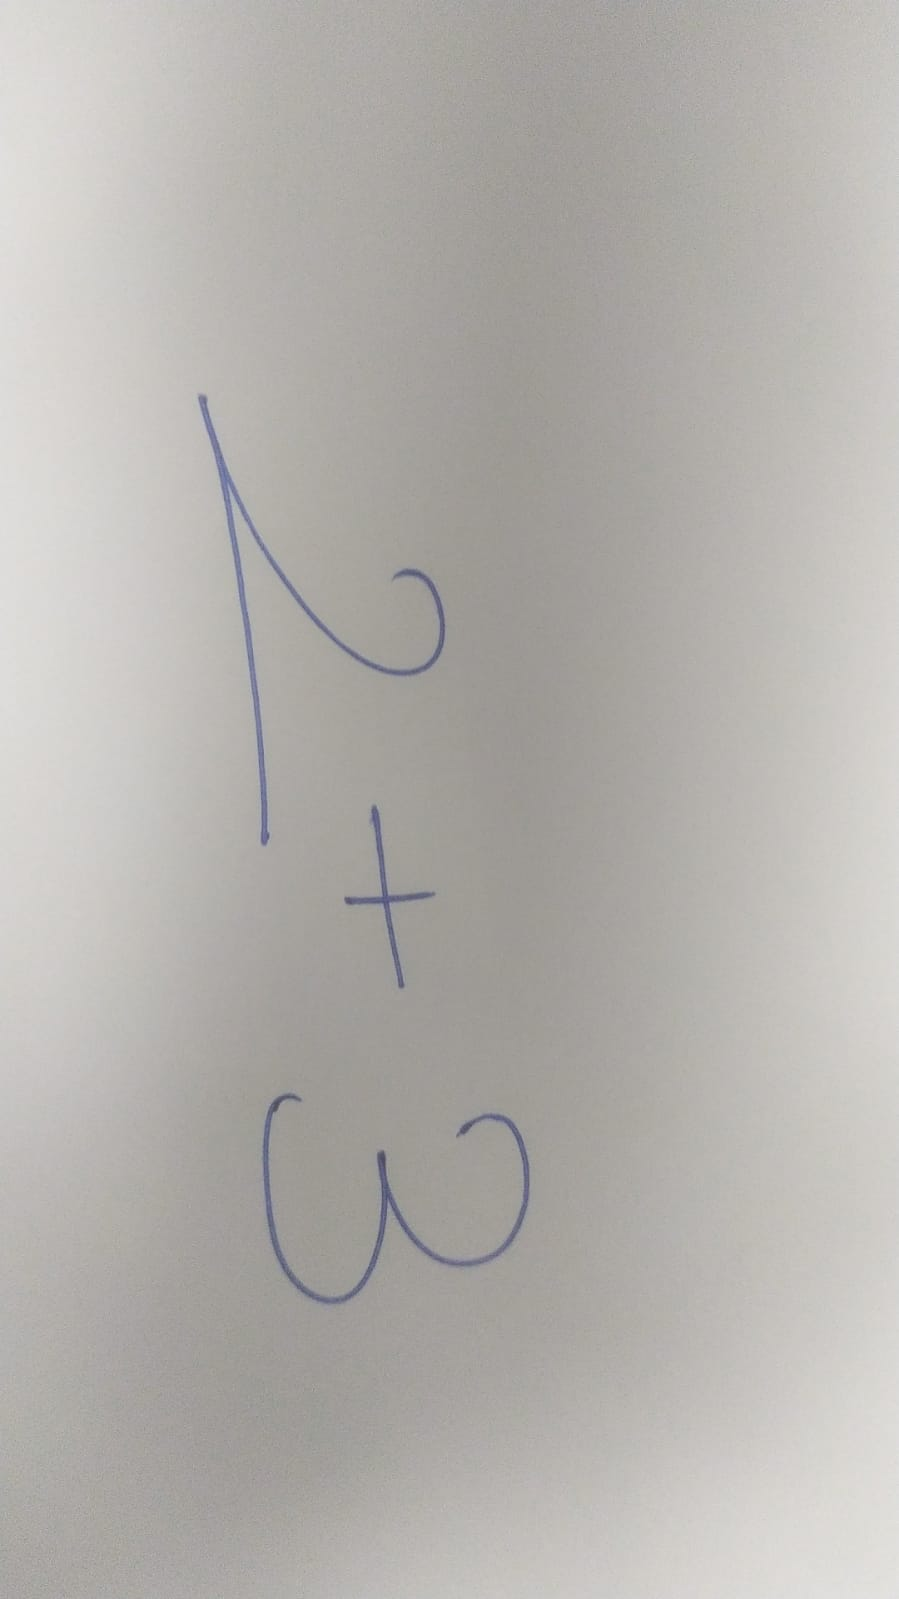

In [72]:
from IPython import display
display.Image("/content/test1.jpg",width=250)

In [74]:
if img is not None:
    #images.append(img)
    img=~img
    ret,thresh=cv2.threshold(img,127,255,cv2.THRESH_BINARY)
    ctrs,ret=cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
    cnt=sorted(ctrs, key=lambda ctr: cv2.boundingRect(ctr)[0])
    w=int(28)
    h=int(28)
    train_data=[]
    print(len(cnt))
    rects=[]
    for c in cnt :
        x,y,w,h= cv2.boundingRect(c)
        rect=[x,y,w,h]
        rects.append(rect)
    print(rects)
    bool_rect=[]
    for r in rects:
        l=[]
        for rec in rects:
            flag=0
            if rec!=r:
                if r[0]<(rec[0]+rec[2]+10) and rec[0]<(r[0]+r[2]+10) and r[1]<(rec[1]+rec[3]+10) and rec[1]<(r[1]+r[3]+10):
                    flag=1
                l.append(flag)
            if rec==r:
                l.append(0)
        bool_rect.append(l)
    print(bool_rect)
    dump_rect=[]
    for i in range(0,len(cnt)):
        for j in range(0,len(cnt)):
            if bool_rect[i][j]==1:
                area1=rects[i][2]*rects[i][3]
                area2=rects[j][2]*rects[j][3]
                if(area1==min(area1,area2)):
                    dump_rect.append(rects[i])
    print(len(dump_rect))
    final_rect=[i for i in rects if i not in dump_rect]
    print(final_rect)
    for r in final_rect:
        x=r[0]
        y=r[1]
        w=r[2]
        h=r[3]
        im_crop =thresh[y:y+h+10,x:x+w+10]


        im_resize = cv2.resize(im_crop,(28,28))


        im_resize=np.reshape(im_resize,(28,28,1))
        train_data.append(im_resize)

62
[[0, 0, 899, 1599], [198, 396, 3, 5], [200, 397, 10, 23], [201, 405, 5, 14], [204, 417, 28, 88], [208, 418, 4, 7], [212, 435, 2, 2], [215, 455, 3, 5], [215, 445, 2, 4], [216, 459, 3, 4], [217, 464, 3, 4], [218, 466, 5, 14], [220, 479, 4, 4], [221, 483, 7, 23], [222, 478, 3, 3], [225, 506, 5, 11], [227, 517, 4, 9], [229, 527, 3, 6], [229, 508, 3, 5], [229, 505, 3, 3], [230, 532, 3, 7], [230, 515, 4, 6], [230, 511, 3, 4], [230, 483, 6, 10], [231, 537, 3, 8], [231, 523, 3, 6], [232, 529, 3, 3], [233, 530, 9, 47], [233, 491, 6, 7], [235, 498, 7, 7], [237, 575, 4, 19], [237, 557, 4, 12], [239, 592, 3, 9], [239, 504, 7, 12], [240, 577, 5, 21], [241, 598, 6, 15], [242, 610, 3, 6], [243, 618, 4, 10], [243, 514, 6, 9], [244, 611, 5, 10], [245, 620, 7, 21], [246, 637, 3, 12], [247, 640, 8, 32], [247, 521, 4, 4], [249, 523, 197, 154], [250, 672, 3, 9], [251, 679, 3, 12], [252, 691, 3, 6], [252, 672, 10, 57], [253, 695, 4, 22], [255, 715, 3, 10], [256, 727, 14, 119], [256, 723, 3, 3], [259, 747

### Finally Doing the Arithmatic Operations and showing te result.

In [75]:
import ast
s=''
for i in range(len(train_data)):
    train_data[i]=np.array(train_data[i])
    train_data[i]=train_data[i].reshape(1,28,28,1)
    result=np.argmax(loaded_model.predict(train_data[i]), axis=-1)
    if(result[0]==10):
        s=s+'-'
    if(result[0]==11):
        s=s+'+'
    if(result[0]==12):
        s=s+'*'
    if(result[0]==0):
        s=s+'0'
    if(result[0]==1):
        s=s+'1'
    if(result[0]==2):
        s=s+'2'
    if(result[0]==3):
        s=s+'3'
    if(result[0]==4):
        s=s+'4'
    if(result[0]==5):
        s=s+'5'
    if(result[0]==6):
        s=s+'6'
    if(result[0]==7):
        s=s+'7'
    if(result[0]==8):
        s=s+'8'
    if(result[0]==9):
        s=s+'9'

print('\nThe Output is:',eval(s))

1/1 [==============================] - 0s 25ms/step

The Output is: 1


Thank you!